# Extreme Fill 2D Example

In [1]:
from collections import namedtuple
from toolz.curried import map, pipe, compose, get, do, curry, count, pluck, juxt, flip
from extremefill2D.systems import ExtremeFillSystem
from extremefill2D.tools import WriteCupricData
import tempfile
import shutil

In [2]:
def fcompose(*args):
    return compose(*args[::-1])

def make_object(dict_):
    return namedtuple("ParamClass", dict_.keys())(*dict_.values())

def get_tmp_file():
    with tempfile.NamedTemporaryFile(suffix='.h5', delete=False) as f:
        datafile = f.name
    return datafile

def run(**params):
    return ExtremeFillSystem(make_object(params),
                             WriteCupricData(get_tmp_file())).run()
    
@curry
def move_file(old, new='data.h5'):
    shutil.move(old, new)
    return new

main = fcompose(
    run,
    move_file
)

In [3]:
datafile = main(
    CFL=0.1,
    Nx=100,
    tol=1e-10,
    sweeps=4,
    solver_tol=1e-6,
    areaRatio=0.093,
    kPlus=100.0,
    kMinus=2.45e7,
    featureDepth=56e-6,
    deltaRef=0.03,
    dtMax=1.0,
    totalTime=5000.0,
    appliedPotential=-0.25,
    bulkSuppressor=0.02,
    totalSteps=200,
    rinner=3.1e-6,
    router=8.5e-6,
    rboundary=50e-6,
    levelset_update_ncell=15,
    spacing_ratio=1.1,
    data_frequency=10,
    shutdown_deposition_rate=1e-13,
    dtMin=5e-8,
    dt=0.01,
    i1=-40.0,
    i0=40.0,
    diffusionCupric=2.65e-10,
    faradaysConstant=9.6485e4,
    gasConstant=8.314,
    temperature=298.0,
    alpha=0.4,
    charge=2,
    bulkCupric=1000.0,
    diffusionSuppressor=9.2e-11,
    kappa=15.26,
    omega=7.1e-6,
    gamma=2.5e-7,
    capacitance=0.3,
    NxBase=1000,
    delta=150e-6,
    current=1e-7
)


Step Number              dt    Elapsed Time    Redo Timestep
             1       1.100e-02       1.100e-02            False
           $\psi$        $c_{cu}$    $c_{\theta}$        $\theta$
0       8.681e-07       4.499e-12       2.209e-16       9.719e-12
1       8.221e-07       1.481e-21       2.209e-16       9.719e-12
2       8.221e-07       1.481e-21       2.209e-16       9.719e-12
3       8.221e-07       1.481e-21       2.209e-16       9.719e-12
Step Number              dt    Elapsed Time    Redo Timestep
             2       1.210e-02       2.310e-02            False
           $\psi$        $c_{cu}$    $c_{\theta}$        $\theta$
0       8.221e-07       1.733e-12       2.209e-16       1.069e-11
1       7.949e-07       1.338e-21       2.209e-16       1.069e-11
2       7.949e-07       1.338e-21       2.209e-16       1.069e-11
3       7.949e-07       1.338e-21       2.209e-16       1.069e-11
Step Number              dt    Elapsed Time    Redo Timestep
             3       1.331e-0

AttributeError: 'File' object has no attribute 'getNode'

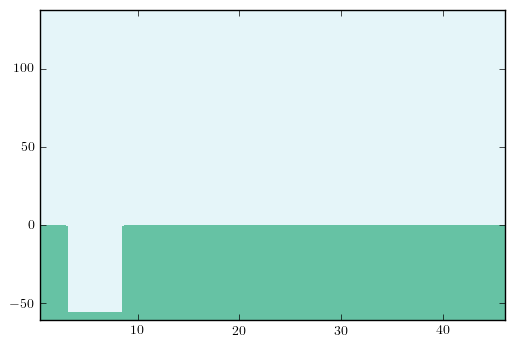

In [5]:
%matplotlib inline

from extremefill2D.contourViewer import ContourViewer
datafile = 'data.h5'
viewer = ContourViewer(datafile, indexJump=10, featureDepth=56e-6)
viewer.plot(indices=[0, 10, 20, ])
